In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, copy

In [2]:
df = pd.read_csv('car_prices.csv')
x_train = df[['mileage','age','engine_size','location']].to_numpy()
y_train = df['price'].to_numpy()
x_features = ['mileage','age','engine_size','location']

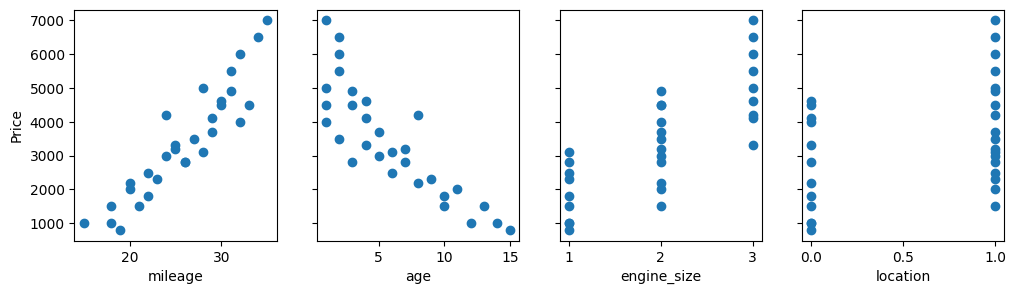

In [3]:
fig,ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel('Price')
plt.show()

In [5]:
def zscore_normalize_feature(x):
    mu = np.mean(x)
    sigma = np.std(x)
    x_norm = (x-mu)/sigma
    return (x_norm,mu,sigma)

In [8]:
def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw

In [10]:
def gradient_descent(x,y,w,b,gradient_function,alpha,iters):
    for i in range(iters):
        dj_db,dj_dw = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b

In [ ]:
x_norm,mu,sigma = zscore_normalize_feature(x_train)
w_init = np.zeros(x_norm.shape[1])
b_init = 0
w_norm, b_norm = gradient_descent(x_norm,y_train,w_init,b_init,compute_gradient,1e-2,1000)

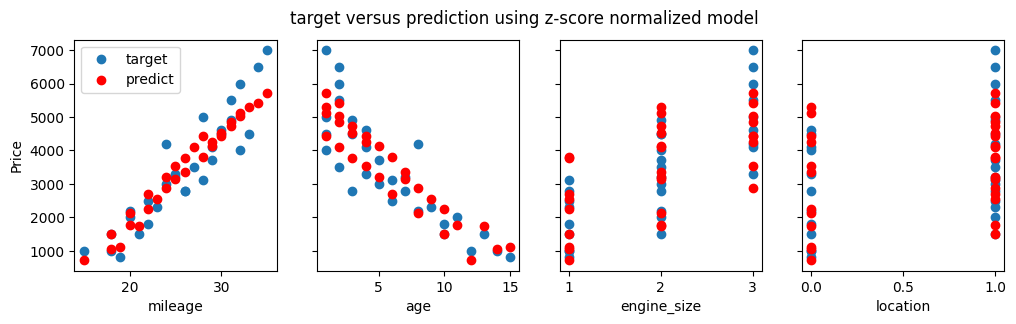

In [ ]:
m = x_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(x_norm[i], w_norm) + b_norm   
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],yp,color='r', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [17]:
x_predict = np.array([27,5,2,1])
x_predict = (x_predict-mu)/sigma
x_predict = x_predict.reshape(1,-1)
y_predict = np.dot(x_predict,w_norm) + b_norm
print(f"Price Prediction: {y_predict}")

Price Prediction: [3754.06899678]
